In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fugu_modules import Model
def setup_plot(y_limits=None):
    """Set up the plot with common settings."""
    fig = plt.figure(figsize=(10, 5)) 
    ax = plt.gca()
    fig.fontsize = 12
    plt.tight_layout()
    ax.grid(True)
    # ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
    
    if y_limits is not None:
        ax.set_ylim(y_limits)
    
    return ax
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

## Evaluate based on latency 

In [2]:
test = pd.read_csv('/Users/coltersirlin/Desktop/cs293n/netrep_100ms.csv')
print(test['trans_time0'].describe())
test['in'] = test.iloc[:, :62].apply(list, axis=1)

test_input = np.array(test['in'].tolist())
test_output = np.array(test['actual'].tolist())

count    651528.000000
mean          3.976824
std           4.759738
min           0.120000
25%           0.995000
50%           1.775000
75%           6.312000
max         162.436000
Name: trans_time0, dtype: float64


In [ ]:
model = Model()
# you need to download this model from puffer website or use the one I put here
model.load('/Users/coltersirlin/Desktop/cs293n/cs293-underspec/bbr-20221001-1/py-4-checkpoint-200.pt')
model.evaluate(test_input, test_output, '/mnt/md0/jaber/puffer_trustee/evals/OctAll_s_eval.csv')


AttributeError: 'Model' object has no attribute 'evaluate_per_chunk1'

# Evaluate the model

In [16]:
test_df = pd.read_csv('/mnt/md0/jaber/puffer_trustee/ttpABR_14days/test_netReplica_min100rtt_max6Mdelivery.csv')
# test_df = pd.read_csv('test_allFields_ttpABR14_min100rtt_max4Mdelivery.csv')
# trans_time_cols = [col for col in test_df.columns if col.startswith('trans_time')]
# test_df[trans_time_cols] = test_df[trans_time_cols] / 1000


print(test_df['trans_time0'].describe())
test_df['in'] = test_df.iloc[:, :62].apply(list, axis=1)

test_input = np.array(test_df['in'].tolist())
test_output = np.array(test_df['actual'].tolist())

count    57929.000000
mean         3.128675
std          3.839736
min          0.125000
25%          1.030000
50%          1.511000
75%          2.745000
max         61.336000
Name: trans_time0, dtype: float64


In [18]:
model = Model()
model.load('/mnt/md0/jaber/puffer_trustee/netrep_fineTune/model_6mCap.pt')
# model.load('/mnt/md0/jaber/puffer_trustee/netrep_model_4m_100ms/corrected_model.pt')
# model.load('/mnt/md0/vamsi995/puffer_retrain/bbr-20221001-1/py-4-checkpoint-200.pt')
# model.load('/mnt/md0/jaber/puffer_trustee/feb_bbr-20190202-1/py-4-checkpoint-100.pt')
# model.load('/mnt/md0/jaber/puffer_trustee/bbr-20221001-1/py-4-checkpoint-200.pt')
# model.load('/mnt/md0/jaber/puffer_trustee/puffer_fineTune/model_6mCap.pt')
# model.load('/mnt/md0/jaber/puffer_trustee/puffer_fineTune/combine_puffer_netrep.pt')
model.evaluate_per_chunk1(test_input, test_output, 'fineTune_onNetRep.csv')


Length of predictions:  57929
Length of actual:  57929
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
Test Mean Squared Error (Model Output): 1.9419370433289025
Test Mean Squared Error (Probability Prediction): 1.8432015140702749


In [22]:
netrep = pd.read_csv('fineTune_onNetRep.csv')
fugu = pd.read_csv('fugu22onNetRep.csv')

In [20]:
print("mse piont:" , mean_squared_error(result["actual"], result["point_predict"]))
print("mse prob", mean_squared_error(result["actual"], result["prob_predict"]))

print("MAPE piont:" , mean_absolute_percentage_error(result["actual"], result["point_predict"]))
print("MAPE prob", mean_absolute_percentage_error(result["actual"], result["prob_predict"]))

mse piont: 1.9419370433289025
mse prob 1.8432015140702749
MAPE piont: 0.21998131568469736
MAPE prob 0.29587594554401475


MSE (Point Estimate): 1.9419370433289025
MSE (Probabilistic): 1.8432015140702749
MAPE (Point Estimate): 0.21998131568469736
MAPE (Probabilistic): 0.29587594554401475


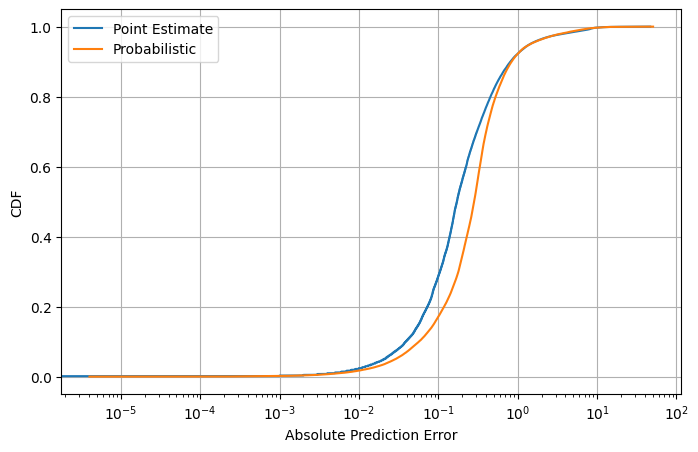

In [ ]:


# Plot CDF
plt.figure(figsize=(8, 5))
for col, label in zip(["error_point", "error_prob"], ["Point Estimate", "Probabilistic"]):
    sorted_errors = np.sort(result[col])
    cdf = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors)
    plt.plot(sorted_errors, cdf, label=label)

plt.xlabel("Absolute Prediction Error")
plt.ylabel("CDF")
plt.legend()
plt.xscale('log')
plt.grid()
plt.show()

In [9]:
plt.figure(figsize=(8, 5))
for col, label in zip(["error_point", "error_prob"], ["Point Estimate", "Probabilistic"]):
    sorted_errors = np.sort(result[col])
    cdf = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors)
    plt.plot(sorted_errors, cdf, label=label)

plt.xlabel("Prediction Error")
plt.ylabel("CDF")
plt.legend()
plt.grid()
plt.show()

KeyError: 'error_point'

<Figure size 800x500 with 0 Axes>

In [8]:
df = pd.read_csv('netrep_on_netrep_AlexFunc.csv')
df1 = pd.read_csv('netrep_on_netrep.csv')

In [ ]:
# # read pkl file 
# import pickle
# with open('/mnt/md0/jaber/puffer_trustee/onAndOff_4m_pfifo_latency100_4m/onAndOff_latency.pkl', 'rb') as f:
#     df1 = pickle.load(f)

In [2]:
df = pd.read_csv('/mnt/md0/jaber/puffer_trustee/ttpABR_14days/train_netReplica_min100rtt_max6Mdelivery.csv')

In [3]:
df['trans_time0'].describe()

count    230000.000000
mean          3.128617
std           3.833928
min           0.125000
25%           1.036000
50%           1.518000
75%           2.765000
max          61.974000
Name: trans_time0, dtype: float64

# Training

In [2]:
### with the CSV data or PKL

In [ ]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('/mnt/md0/jaber/puffer_trustee/ttpABR_14days/train_puffer_min100rtt_max6Mdelivery.csv')
df['in'] = df.iloc[:, :62].apply(list, axis=1)
df['trans_time2'].describe()

# Convert the trans_time columns if the scale is not right, it should be in seconds not ms 
# trans_time_cols = [col for col in test_df.columns if col.startswith('trans_time')]
# test_df[trans_time_cols] = test_df[trans_time_cols] / 1000

input_data = np.array(df['in'].tolist())
# should we use predict as train output or the actual output?
output_data = np.array(df['actual'].tolist())
# IMPORTANT: Change the transtime scale for input too 


model = Model()
train_input, test_input, train_output, test_output = train_test_split(
    input_data, output_data, test_size=0.01, random_state=42)
model.train(train_input, train_output, test_input, test_output)

# model.evaluate(test_input, test_output)
model.save('/mnt/md0/jaber/puffer_trustee/puffer_model/6m_model_scratch2.pt')

In [2]:

df = pd.read_csv('/mnt/md0/vamsi995/puffer_retrain/data/train_netReplica_min100rtt_max4Mdelivery.csv')

df['in'] = df.iloc[:, :62].apply(list, axis=1)

train_input = np.array(df['in'].tolist())
# should we use predict as train output or the actual output?
train_output = np.array(df['actual'].tolist())


# Fine tune

In [10]:
## Find Tuning 
from sklearn.model_selection import train_test_split
df = pd.read_csv('/mnt/md0/jaber/puffer_trustee/ttpABR_14days/train_netReplica_min100rtt_max6Mdelivery.csv')
df2 = pd.read_csv('/mnt/md0/jaber/puffer_trustee/ttpABR_14days/train_puffer_min100rtt_max6Mdelivery.csv')
# add df2 to df
df = pd.concat([df, df2])

print(len(df))

# trans_time_cols = [col for col in df.columns if col.startswith('trans_time')]
# df[trans_time_cols] = df[trans_time_cols] / 1000
print(df['trans_time0'].describe())

df['in'] = df.iloc[:, :62].apply(list, axis=1)

input_data = np.array(df['in'].tolist())
# should we use predict as train output or the actual output?
output_data = np.array(df['actual'].tolist())

# model = Model()
# model.load('/mnt/md0/vamsi995/puffer_retrain/train_models/fine_tune.pt')


# print(len(processed_data[0]['in']))
# print(len(processed_data[0]['out']))


# model = Model()
# model.load_model("/mnt/md0/vamsi995/puffer_retrain/bbr-20221001-1/cpp-4-checkpoint-200.pt", "/mnt/md0/vamsi995/puffer_retrain/bbr-20221001-1/cpp-meta-4-checkpoint-200.json")
model = Model()
model.load("/mnt/md0/vamsi995/puffer_retrain/train_models/fine_tune_all_data.pt")


train_input, test_input, train_output, test_output = train_test_split(
    input_data, output_data, test_size=0.01, random_state=42
)
model.train(train_input, train_output, test_input, test_output)
# model.evaluate(input_data, output_data)

model.save('/mnt/md0/jaber/puffer_trustee/puffer_fineTune/combine_puffer_netrep.pt')

460000
count    460000.000000
mean          2.453494
std           2.992564
min         -30.117000
25%           1.014000
50%           1.555000
75%           2.370000
max         127.289000
Name: trans_time0, dtype: float64
Epoch 1/500, Loss: 1.5980847009796588
Epoch 2/500, Loss: 1.3138924922963453
Epoch 3/500, Loss: 1.26601781810071
Epoch 4/500, Loss: 1.2423567958747526
Epoch 5/500, Loss: 1.2267550515236716
Epoch 6/500, Loss: 1.2150853003691267
Epoch 7/500, Loss: 1.2053871828837932
Epoch 8/500, Loss: 1.1969746263463767
Epoch 9/500, Loss: 1.1890463834135898
Epoch 10/500, Loss: 1.1820614726206427
Epoch 11/500, Loss: 1.175732544425017
Epoch 12/500, Loss: 1.170112464489829
Epoch 13/500, Loss: 1.165121525136457
Epoch 14/500, Loss: 1.1604870061460357
Epoch 15/500, Loss: 1.1565437764760436
Epoch 16/500, Loss: 1.1528843480185667
Epoch 17/500, Loss: 1.1493267992220089
Epoch 18/500, Loss: 1.146178473747583
Epoch 19/500, Loss: 1.1430609762953419
Epoch 20/500, Loss: 1.1402785490099476
Epoch 21/5

# Model performance visual

In [8]:
df1 = pd.read_csv('netrep_on_netrep.csv')
df2 = pd.read_csv('netrep_on_puffer.csv')
df3 = pd.read_csv('puffer_on_puffer.csv')
df4 = pd.read_csv('puffer_on_netrep.csv')
df5 = pd.read_csv('fugu_on_netrep.csv')
df6 = pd.read_csv('fugu_on_puffer.csv')
df7 = pd.read_csv('fuguFeb_on_netrep.csv')
df8 = pd.read_csv('fuguFeb_on_puffer.csv')
df9 = pd.read_csv('fineTune_netrep_on_netrep.csv')
df10 = pd.read_csv('fineTune_netrep_on_puffer.csv')

# column names are trans_time0 to trans_time7 and then predict and actual time
# columns = ['trasn_time0', 'trans_time1', 'trasn_time2','trasn_time3','trasn_time4','trasn_time5','trasn_time6', 'trasn_time7', 'predict', 'actual']
# df1.columns = columns
# df2.columns = columns
# df3.columns = columns
# df4.columns = columns
# df5.columns = columns

# # claculate the error which is the difference between the actual and the predicted time
# df1['error'] = abs(df1['actual'] - df1['predict']) * 1000
# df2['error'] = abs(df2['actual'] - df2['predict']) * 1000
# df3['error'] = abs(df3['actual'] - df3['predict']) * 1000
# df4['error'] = abs(df4['actual'] - df4['predict']) * 1000
# df5['error'] = abs(df5['actual'] - df5['predict']) * 1000



In [9]:
df1['point_error'] = df1['point_error'] * 1000
df2['point_error'] = df2['point_error'] * 1000
df3['point_error'] = df3['point_error'] * 1000
df4['point_error'] = df4['point_error'] * 1000
df5['point_error'] = df5['point_error'] * 1000
df6['point_error'] = df6['point_error'] * 1000
df7['point_error'] = df7['point_error'] * 1000
df8['point_error'] = df8['point_error'] * 1000
df9['point_error'] = df9['point_error'] * 1000
df10['point_error'] = df10['point_error'] * 1000


In [13]:
dfs = {
    "Model: netReplica,  Test: netReplica": df1,
    # "Model: netReplica,  Test: Puffer": df2,
    "Model: Puffer,  Test: netReplica": df4,
    "Model: Puffer, Test: Puffer": df3, 
    "Model: Fugu,  Test: netReplica": df5,
    # "Model: Fugu,  Test: Puffer": df6,
    "Model: FuguFeb,  Test: netReplica": df7,
    # "Model: FuguFeb,  Test: Puffer": df8,
    "Model: Fine Tuned with netReplica,  Test: netReplica": df9
    # "Model: Fine Tuned with netReplica,  Test: Puffer": df10
}

In [14]:
# print the 96th percentile of the error for all of dhet modesl
for key, df in dfs.items():
    print(key, df['point_error'].quantile(0.96))

Model: netReplica,  Test: netReplica 2038.040000000001
Model: Puffer,  Test: netReplica 8583.0
Model: Puffer, Test: Puffer 6761.0
Model: Fugu,  Test: netReplica 1911.0400000000009
Model: FuguFeb,  Test: netReplica 1808.0400000000009
Model: Fine Tuned with netReplica,  Test: netReplica 1781.1200000000026


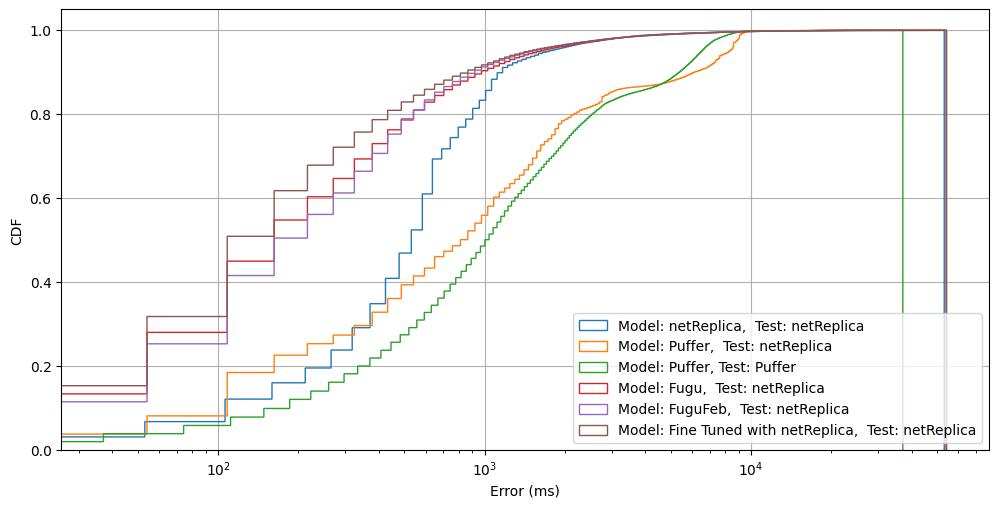

In [15]:
# plot the cdf for the error greter thatn 95th percentile
fig = plt.figure(figsize=(10, 5))
ax = plt.gca()
fig.fontsize = 12
plt.tight_layout()
ax.grid(True)
ax.set_xscale('log')
ax.set_xlabel('Error (ms)')
ax.set_ylabel('CDF')
for key, df in dfs.items():
    df['point_error'].hist(cumulative=True, bins=1000, density=True, histtype='step', label=key)
plt.legend()
plt.show()

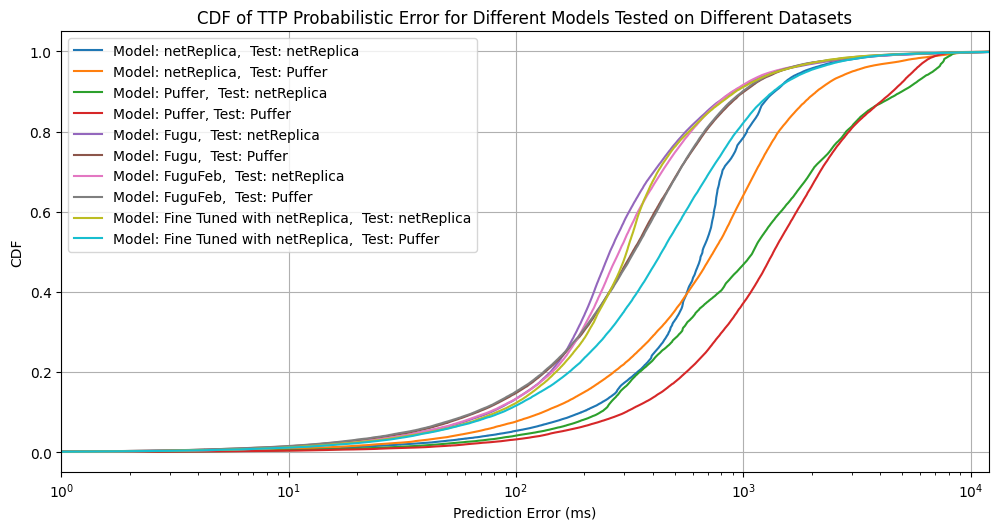

In [66]:
# plot the cdf of error on df1 using line plot
ax = setup_plot()
for label, df in dfs.items():
    sorted_errors = np.sort(df["prob_error"])
    cdf = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors)
    plt.plot(sorted_errors, cdf, label=label)

plt.xlabel("Prediction Error (ms)")
plt.ylabel("CDF")
plt.title("CDF of TTP Probabilistic Error for Different Models Tested on Different Datasets")
plt.legend()
plt.xscale('log')
plt.xlim(1 , 12000)
plt.grid(True)
plt.show()

# Fugu vs Netrep points
### Find the points were fugu was doing well not the netRplica and vice versa

In [154]:
netrep = pd.read_csv('fineTune_netrep_on_netrep.csv')
fugu = pd.read_csv('fugu_on_netrep.csv')
test = pd.read_csv('/mnt/md0/vamsi995/puffer_retrain/data/test_netReplica_min100rtt_max4Mdelivery.csv')

In [155]:
diff = netrep["point_error"] - fugu["point_error"]

In [156]:
# netrep better than netrep 
data = test.iloc[diff.nlargest(7).index]

In [157]:
# append the point_error of netrep and fugu to the data df
data['netrep_point_error'] = netrep.iloc[diff.nlargest(7).index]['point_error'].values
data['fugu_point_error'] = fugu.iloc[diff.nlargest(7).index]['point_error'].values

/tmp/ipykernel_161962/1147385688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['netrep_point_error'] = netrep.iloc[diff.nlargest(7).index]['point_error'].values
/tmp/ipykernel_161962/1147385688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fugu_point_error'] = fugu.iloc[diff.nlargest(7).index]['point_error'].values


In [151]:
data[trans_time_cols]

,trans_time0,trans_time1,trans_time2,trans_time3,trans_time4,trans_time5,trans_time6,trans_time7
32454,691.0,1151.0,878.0,991.0,3751.0,12207.0,1376.0,8546.0
39468,1033.0,996.0,1435.0,1854.0,2111.0,2185.0,3565.0,8394.0
34472,3248.0,2283.0,12337.0,10114.0,3271.0,861.0,1141.0,2639.0
41390,957.0,1443.0,1951.0,2030.0,2947.0,2385.0,3792.0,4781.0
12219,1224.0,1053.0,1854.0,1647.0,2077.0,3524.0,1972.0,3816.0


In [158]:
# Dropping for netReplica outperforms fugu
# data = data.drop(data.index[0])
# data = data.drop(data.index[0])

# Dropping for fugu outperforms netReplica
data = data.drop(data.index[0])
data = data.drop(data.index[2])


### Samples with high and low error 

In [159]:
trans_time_cols = [col for col in data.columns if col.startswith('trans_time')]
rtt_cols = [col for col in data.columns if col.startswith('rtt')]
delivery_cols = [col for col in data.columns if col.startswith('delivery_rate')]
data[delivery_cols] = data[delivery_cols] * (8 * 1500)  / 1000000
data[rtt_cols] = data[rtt_cols] * 1000
data[trans_time_cols] = data[trans_time_cols] / 1000

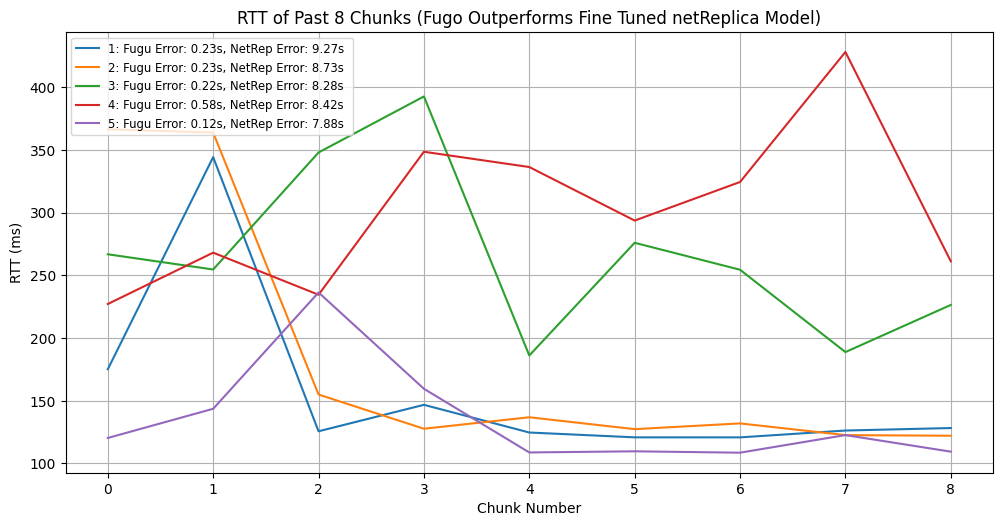

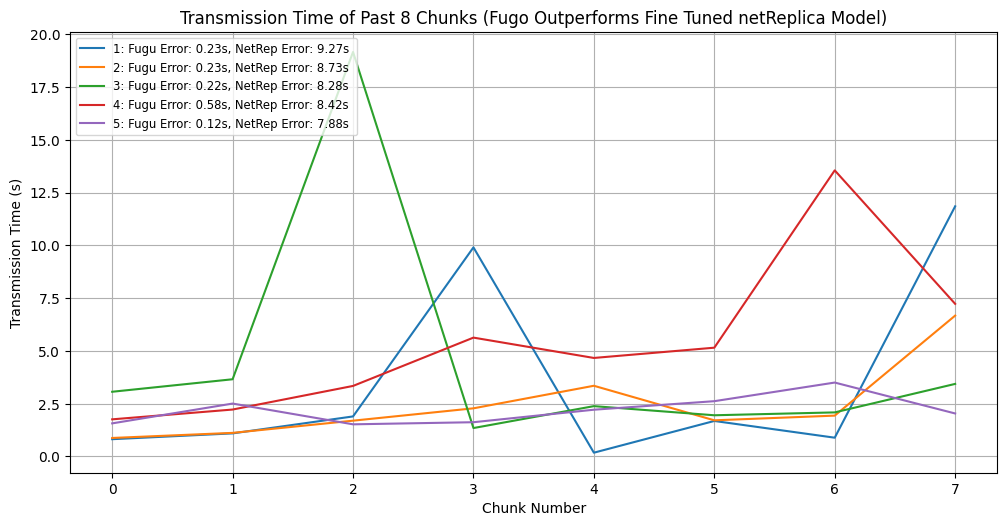

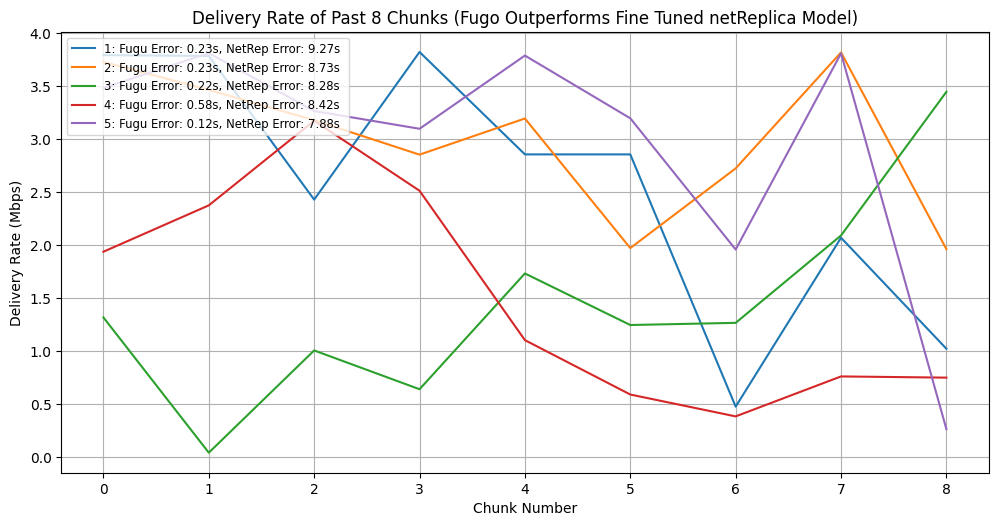

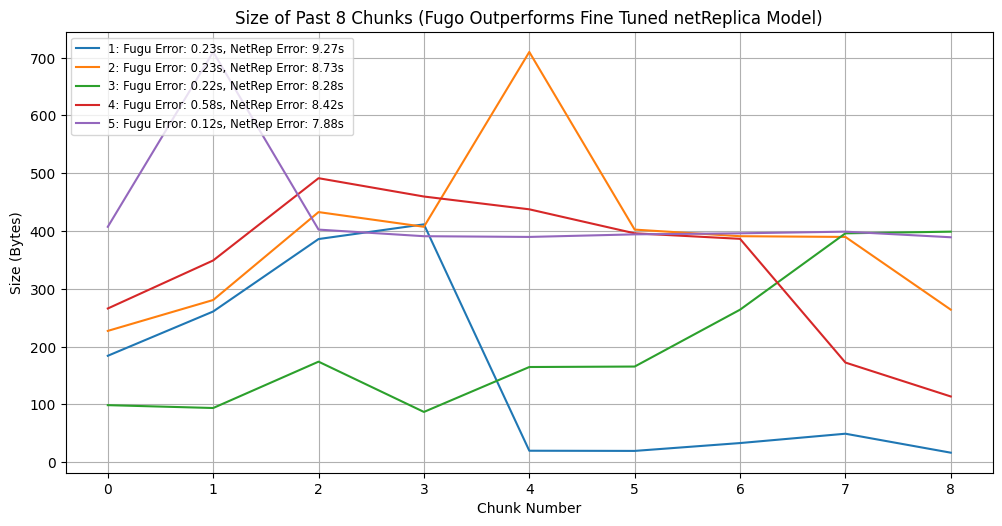

In [160]:
import matplotlib.pyplot as plt

# Define a function to set up the plot
# def setup_plot():
#     fig, ax = plt.subplots(figsize=(10, 5))
#     ax.set_title("Time Series Data (Chunks with Large Sigma)")
#     ax.set_xlabel("Index")
#     ax.set_ylabel("Values")
#     return ax

# Function to plot time series
def plot_time_series(columns_prefix, ax, label, index_range):
    for row_index in range(data.shape[0]):  # Iterate over rows in the DataFrame
        values = [data[f"{columns_prefix}{i}"].iloc[row_index] for i in index_range]
        # add prediction error and sigma to the plot label
        label = f"Fugu Error: {data['fugu_point_error'].iloc[row_index]:.2f}s, NetRep Error: {data['netrep_point_error'].iloc[row_index]:.2f}s"
        ax.plot(index_range, values, label=f"{row_index + 1}: {label} ")

# List of metrics and their respective index ranges
metrics = {
    "rtt": range(9),
    "trans_time": range(8),
    "cwnd": range(9),
    "delivery_rate": range(9),
    "size": range(9),
}

# Loop through each metric and generate the plot
# for metric, index_range in metrics.items():
#     ax = setup_plot()
#     plot_time_series(metric, ax, metric.capitalize(), index_range)
#     ax.legend()
#     plt.show()
    
ax = setup_plot()
plot_time_series('rtt', ax, "RTT (ms)", range(9))
ax.set_title("RTT of Past 8 Chunks (Fugo Outperforms Fine Tuned netReplica Model)")
ax.set_ylabel("RTT (ms)")
ax.set_xlabel("Chunk Number")
ax.legend(loc='upper left', fontsize='small')
plt.show()

ax = setup_plot()
plot_time_series('trans_time', ax, "Transmission Time (s)", range(8))
ax.set_title("Transmission Time of Past 8 Chunks (Fugo Outperforms Fine Tuned netReplica Model)")
ax.set_ylabel("Transmission Time (s)")
ax.set_xlabel("Chunk Number")
ax.legend(loc='upper left', fontsize='small')
plt.show()

ax = setup_plot()
plot_time_series('delivery_rate', ax, "Delivery Rate (Mbps)", range(9))
ax.set_title("Delivery Rate of Past 8 Chunks (Fugo Outperforms Fine Tuned netReplica Model)")
ax.set_ylabel("Delivery Rate (Mbps)")
ax.set_xlabel("Chunk Number")
ax.legend(loc='upper left', fontsize='small')
plt.show()

ax = setup_plot()
plot_time_series('size', ax, "Size (Bytes)", range(9))
ax.set_title("Size of Past 8 Chunks (Fugo Outperforms Fine Tuned netReplica Model)") 
ax.set_ylabel("Size (Bytes)")
ax.set_xlabel("Chunk Number")
# position the legent on top left
ax.legend(loc='upper left', fontsize='small')
plt.show()